# DSCI 552 Final Project - LDA versus ANN


Author: Jiahang Song

In [275]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils
import keras
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.preprocessing import normalize
import numpy as np
import tensorflow as tf
from keras.callbacks import EarlyStopping


## 1. Iris Dataset

In [441]:
iris = datasets.load_iris()

In [344]:
x = iris.data
y = iris.target
target_names = iris.target_names

In [345]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.3, shuffle = True, random_state = 0) #first, split out 20% test dataset


## Linear Discriminant Analysis

In [346]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [347]:
model_1_lda = LinearDiscriminantAnalysis()

In [348]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [349]:
scores = cross_val_score(model_1_lda, train_x, train_y, scoring='accuracy', cv=cv, n_jobs=-1)

In [350]:
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.981 (0.038)


In [351]:
model_1_lda.fit(train_x, train_y)

LinearDiscriminantAnalysis()

In [352]:
predict_y = model_1_lda.predict(test_x)

In [353]:
accuracy_1_lda= sum(predict_y == test_y)/len(test_y)

In [354]:
accuracy_1_lda

0.9777777777777777

## Artificial Neural Network

normalized data to a range of 0-1 for processing

In [355]:
train_x_normalized=normalize(train_x,axis=0)
test_x_normalized=normalize(test_x,axis=0)

In [356]:
train_x_normalized.shape

(105, 4)

In [357]:
test_x_normalized.shape

(45, 4)

In [358]:
y_train_cate=np_utils.to_categorical(train_y,num_classes=3)
y_test_cate=np_utils.to_categorical(test_y,num_classes=3)

In [359]:
model_1_ann=Sequential()
model_1_ann.add(Dense(500,input_dim=4,activation='relu'))
model_1_ann.add(Dense(200,activation='relu'))
model_1_ann.add(Dense(3,activation='softmax'))
model_1_ann.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [360]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5) #earlystopping


In [361]:
history_1_ann = model_1_ann.fit(train_x_normalized,y_train_cate,validation_split = 0.2,epochs=15,verbose=1, callbacks=[es])


Epoch 1/15
3/3 [==============================] - 1s 98ms/step - loss: 1.0970 - accuracy: 0.2738 - val_loss: 1.0884 - val_accuracy: 0.4286
Epoch 2/15
3/3 [==============================] - 0s 20ms/step - loss: 1.0778 - accuracy: 0.6105 - val_loss: 1.0804 - val_accuracy: 0.5714
Epoch 3/15
3/3 [==============================] - 0s 23ms/step - loss: 1.0594 - accuracy: 0.7262 - val_loss: 1.0733 - val_accuracy: 0.5714
Epoch 4/15
3/3 [==============================] - 0s 25ms/step - loss: 1.0406 - accuracy: 0.6987 - val_loss: 1.0640 - val_accuracy: 0.5238
Epoch 5/15
3/3 [==============================] - 0s 25ms/step - loss: 1.0259 - accuracy: 0.6830 - val_loss: 1.0524 - val_accuracy: 0.5714
Epoch 6/15
3/3 [==============================] - 0s 25ms/step - loss: 1.0089 - accuracy: 0.7048 - val_loss: 1.0392 - val_accuracy: 0.5714
Epoch 7/15
3/3 [==============================] - 0s 25ms/step - loss: 0.9864 - accuracy: 0.7225 - val_loss: 1.0240 - val_accuracy: 0.5714
Epoch 00007: early stopping

In [362]:
prediction=model_1_ann.predict(test_x_normalized)
length=len(prediction)
y_label=np.argmax(y_test_cate,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy_1_ann=np.sum(y_label==predict_label)/length 
print("Accuracy of the dataset",accuracy_1_ann )

Accuracy of the dataset 0.5777777777777777


## 2. Wine Dataset

In [168]:
wine = pd.read_csv('wine.csv')


In [179]:
data = wine.drop(wine.columns[0], axis=1)

In [181]:
data

,Cultivars,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [184]:
x_wine = data[data.columns[-13:]]
y_wine = data.Cultivars

In [186]:
train_x, test_x, train_y, test_y = train_test_split(x_wine,y_wine, test_size=0.2, shuffle = True, random_state = 1) #first, split out 20% test dataset


## LDA

In [188]:
model_2_lda = LinearDiscriminantAnalysis()

In [189]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [190]:
scores = cross_val_score(model_2_lda, train_x, train_y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.986 (0.028)


In [191]:
model_2_lda.fit(train_x, train_y)

LinearDiscriminantAnalysis()

In [193]:
predict_y = model_2_lda.predict(test_x)
accuracy_2_lda= sum(predict_y == test_y)/len(test_y)
print("LDA Accuracy: ",accuracy_2_lda )

LDA Accuracy:  1.0


## ANN

In [196]:
train_x_normalized=normalize(train_x,axis=0)
test_x_normalized=normalize(test_x,axis=0)


In [198]:
train_x_normalized.shape

(142, 13)

In [207]:
train_y_dummy = pd.get_dummies(train_y)
test_y_dummy = pd.get_dummies(test_y)

In [208]:
model_2_ann=Sequential()
model_2_ann.add(Dense(500,input_dim=13,activation='relu'))
model_2_ann.add(Dense(200,activation='relu'))
model_2_ann.add(Dense(3,activation='softmax'))
model_2_ann.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [210]:
history_2_ann = model_2_ann.fit(train_x_normalized,train_y_dummy,validation_split = 0.2,epochs=25,verbose=1)


Epoch 1/25
4/4 [==============================] - 0s 55ms/step - loss: 0.4162 - accuracy: 0.9469 - val_loss: 0.4816 - val_accuracy: 0.8966
Epoch 2/25
4/4 [==============================] - 0s 21ms/step - loss: 0.3775 - accuracy: 0.9381 - val_loss: 0.4022 - val_accuracy: 0.9655
Epoch 3/25
4/4 [==============================] - 0s 25ms/step - loss: 0.3483 - accuracy: 0.9469 - val_loss: 0.3486 - val_accuracy: 0.9310
Epoch 4/25
4/4 [==============================] - 0s 21ms/step - loss: 0.2976 - accuracy: 0.9735 - val_loss: 0.3852 - val_accuracy: 0.8966
Epoch 5/25
4/4 [==============================] - 0s 16ms/step - loss: 0.2824 - accuracy: 0.9381 - val_loss: 0.3306 - val_accuracy: 0.9310
Epoch 6/25
4/4 [==============================] - 0s 19ms/step - loss: 0.2529 - accuracy: 0.9646 - val_loss: 0.2861 - val_accuracy: 0.9655
Epoch 7/25
4/4 [==============================] - 0s 19ms/step - loss: 0.2260 - accuracy: 0.9558 - val_loss: 0.2910 - val_accuracy: 0.9655
Epoch 8/25
4/4 [===========

In [224]:
ann_2_score, accuracy_2_ann = model_2_ann.evaluate(test_x_normalized,test_y_dummy)

2/2 [==============================] - 0s 9ms/step - loss: 0.4886 - accuracy: 0.8056


In [225]:
accuracy_2_ann

0.8055555820465088

## 3. MNIST Fashion Dataset

In [237]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [247]:
train_y = train.label
test_y = test.label
train_x = train.drop('label', axis = 1)/255
test_x = test.drop('label', axis = 1)/255

## LDA

In [243]:
model_3_lda = LinearDiscriminantAnalysis()

In [244]:
model_3_lda.fit(train_x, train_y)

LinearDiscriminantAnalysis()

In [245]:
predict_y = model_3_lda.predict(test_x)
accuracy_3_lda= sum(predict_y == test_y)/len(test_y)
print("LDA Accuracy: ",accuracy_3_lda )

LDA Accuracy:  0.8256


## ANN

In [255]:
train_y_dummy = pd.get_dummies(train_y)
test_y_dummy = pd.get_dummies(test_y)

In [256]:
train_y_dummy

,0,1,2,3,4,5,6,7,8,9
0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,1
59996,0,1,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,1,0
59998,0,0,0,0,0,0,0,0,1,0


In [258]:
model_3_ann=Sequential()
model_3_ann.add(Dense(500,input_dim=784,activation='relu'))
model_3_ann.add(Dense(200,activation='relu'))
model_3_ann.add(Dense(10,activation='softmax'))
model_3_ann.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [259]:
history_3_ann = model_3_ann.fit(train_x,train_y_dummy,validation_split = 0.2,epochs=15,verbose=1)


Epoch 1/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6144 - accuracy: 0.7838 - val_loss: 0.4734 - val_accuracy: 0.8289
Epoch 2/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3760 - accuracy: 0.8615 - val_loss: 0.3786 - val_accuracy: 0.8593
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3342 - accuracy: 0.8767 - val_loss: 0.3646 - val_accuracy: 0.8698
Epoch 4/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3079 - accuracy: 0.8855 - val_loss: 0.3439 - val_accuracy: 0.8764
Epoch 5/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2873 - accuracy: 0.8916 - val_loss: 0.3236 - val_accuracy: 0.8857
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2720 - accuracy: 0.8966 - val_loss: 0.3350 - val_accuracy: 0.8788
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2564 - accuracy: 0.9031 - val_loss: 0.3299 - val_accuracy:

In [260]:
ann_3_score, accuracy_3_ann = model_3_ann.evaluate(test_x,test_y_dummy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3177 - accuracy: 0.8971


In [261]:
accuracy_3_ann

0.8970999717712402

#### Increase the number of training data to check if the test accuracy for both methods increases

In [421]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')
test_x = test.drop('label', axis = 1)/255
test_y = test.label
test_y_dummy = pd.get_dummies(test_y)

In [399]:
def ann(number):
    train_y = train[:number].label
    
    train_x = train[:number].drop('label', axis = 1)/255
    
    train_y_dummy = pd.get_dummies(train_y)
    
    es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5) #earlystopping

    model_ann=Sequential()
    model_ann.add(Dense(500,input_dim=784,activation='relu'))
    model_ann.add(Dense(200,activation='relu'))
    model_ann.add(Dense(10,activation='softmax'))
    model_ann.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    history_ann = model_ann.fit(train_x,train_y_dummy,validation_split = 0.2,epochs=20,verbose=1, callbacks=[es])
    ann_score, accuracy_ann = model_ann.evaluate(test_x,test_y_dummy)
    return accuracy_ann

In [400]:
training_number = [5000, 10000, 15000, 20000,25000,30000,35000,40000,45000,50000,55000,60000]

In [401]:
ann_result = []
for i in training_number:
    ann_result.append(ann(i))

Epoch 1/20
125/125 [==============================] - 1s 5ms/step - loss: 1.0336 - accuracy: 0.6358 - val_loss: 0.5740 - val_accuracy: 0.8090
Epoch 2/20
125/125 [==============================] - 1s 4ms/step - loss: 0.5027 - accuracy: 0.8290 - val_loss: 0.5282 - val_accuracy: 0.8140
Epoch 3/20
125/125 [==============================] - 1s 5ms/step - loss: 0.4197 - accuracy: 0.8551 - val_loss: 0.5886 - val_accuracy: 0.8000
Epoch 4/20
125/125 [==============================] - 1s 4ms/step - loss: 0.3980 - accuracy: 0.8575 - val_loss: 0.5494 - val_accuracy: 0.7970
Epoch 5/20
125/125 [==============================] - 1s 4ms/step - loss: 0.3440 - accuracy: 0.8730 - val_loss: 0.5147 - val_accuracy: 0.8220
Epoch 6/20
125/125 [==============================] - 0s 4ms/step - loss: 0.3429 - accuracy: 0.8702 - val_loss: 0.4582 - val_accuracy: 0.8350
Epoch 7/20
125/125 [==============================] - 0s 4ms/step - loss: 0.3021 - accuracy: 0.8866 - val_loss: 0.4849 - val_accuracy: 0.8370
Epoch 

In [422]:
def lda(number):
    model_lda = LinearDiscriminantAnalysis()
    x =train[:number].drop('label', axis = 1)/255
    y = train[:number].label
    model_lda.fit(x,y)
    
    predict_y_lda = model_lda.predict(test_x)
    accuracy_lda= sum(predict_y_lda == test_y)/len(test_y)
    return accuracy_lda

In [423]:
lda_result = []
for i in training_number:
    lda_result.append(lda(i))

In [425]:
column = {'Number of Training Data':training_number, 'Linear Discriminant Analysis Test Accuracy': lda_result, 'Neural Networks Test Accuracy': ann_result}
df_1 = pd.DataFrame(data=column)

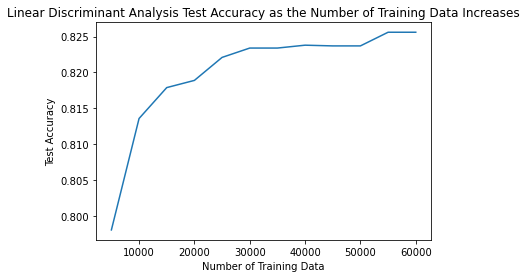

In [431]:
plt.plot(df_1['Number of Training Data'], df_1['Linear Discriminant Analysis Test Accuracy'])

plt.title('Linear Discriminant Analysis Test Accuracy as the Number of Training Data Increases')
plt.xlabel('Number of Training Data')
plt.ylabel('Test Accuracy')
plt.show()

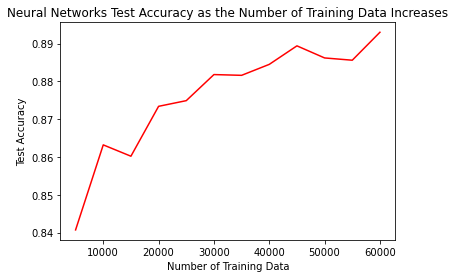

In [432]:
plt.plot(df_1['Number of Training Data'], df_1['Neural Networks Test Accuracy'], color = 'r')

plt.title('Neural Networks Test Accuracy as the Number of Training Data Increases')
plt.xlabel('Number of Training Data')
plt.ylabel('Test Accuracy')
plt.show()


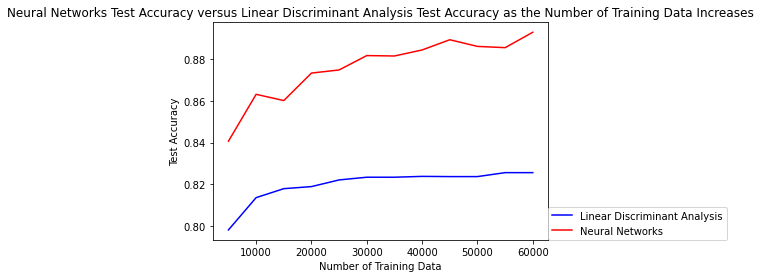

In [440]:
plt.plot(df_1['Number of Training Data'],df_1['Linear Discriminant Analysis Test Accuracy'], color = 'b', label = 'Linear Discriminant Analysis')
plt.plot(df_1['Number of Training Data'], df_1['Neural Networks Test Accuracy'], color = 'r', label = 'Neural Networks')
plt.title('Neural Networks Test Accuracy versus Linear Discriminant Analysis Test Accuracy as the Number of Training Data Increases')
plt.xlabel('Number of Training Data')
plt.ylabel('Test Accuracy')
plt.legend(loc=(1, 0))

plt.show()

In [449]:
lda_result

[0.7981,
 0.8136,
 0.8179,
 0.8189,
 0.8221,
 0.8234,
 0.8234,
 0.8238,
 0.8237,
 0.8237,
 0.8256,
 0.8256]

In [455]:
def slope(data):
    slope_list = []
    for i in range(len(data)-1):
        sl = (data[i+1] - data[i])/data[i]
        slope_list.append(sl)
    return (sum(slope_list)/len(slope_list))

In [457]:
print ("LDA Average Slope: ", slope(lda_result))
print ("ANN Average Slope: ", slope(ann_result))

LDA Average Slope:  0.0030989986453644276
ANN Average Slope:  0.005538252795947984


## 4. Heart Diseases 

In [263]:
heart = pd.read_csv('heart.csv')


In [264]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [265]:
heart_y = heart.target

heart_x = heart.drop('target', axis = 1)


In [267]:
train_x, test_x, train_y, test_y = train_test_split(heart_x,heart_y, test_size=0.2, shuffle = True, random_state = 2) #first, split out 20% test dataset


## LDA

In [268]:
model_4_lda = LinearDiscriminantAnalysis()
model_4_lda.fit(train_x, train_y)

LinearDiscriminantAnalysis()

In [269]:
predict_y = model_4_lda.predict(test_x)
accuracy_4_lda= sum(predict_y == test_y)/len(test_y)
print("LDA Accuracy: ",accuracy_4_lda )

LDA Accuracy:  0.8688524590163934


## ANN

In [280]:
train_x_normalized=normalize(train_x,axis=0)
test_x_normalized=normalize(test_x,axis=0)
train_y_dummy = pd.get_dummies(train_y)
test_y_dummy = pd.get_dummies(test_y)

In [281]:
model_4_ann=Sequential()
model_4_ann.add(Dense(500,input_dim=13,activation='relu'))
model_4_ann.add(Dense(200,activation='relu'))
model_4_ann.add(Dropout(0.1))
model_4_ann.add(Dense(2,activation='softmax'))
model_4_ann.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [282]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5) #earlystopping


In [284]:
history_4_ann = model_4_ann.fit(train_x_normalized,train_y_dummy,validation_split = 0.2,epochs=40,verbose=1, callbacks=[es] )


Epoch 1/40
7/7 [==============================] - 1s 34ms/step - loss: 0.6871 - accuracy: 0.6410 - val_loss: 0.6573 - val_accuracy: 0.6939
Epoch 2/40
7/7 [==============================] - 0s 9ms/step - loss: 0.6590 - accuracy: 0.6594 - val_loss: 0.6221 - val_accuracy: 0.7347
Epoch 3/40
7/7 [==============================] - 0s 8ms/step - loss: 0.6201 - accuracy: 0.8059 - val_loss: 0.5977 - val_accuracy: 0.8571
Epoch 4/40
7/7 [==============================] - 0s 9ms/step - loss: 0.6012 - accuracy: 0.8029 - val_loss: 0.5448 - val_accuracy: 0.8367
Epoch 5/40
7/7 [==============================] - 0s 9ms/step - loss: 0.5606 - accuracy: 0.7825 - val_loss: 0.4917 - val_accuracy: 0.8163
Epoch 6/40
7/7 [==============================] - 0s 9ms/step - loss: 0.5093 - accuracy: 0.8182 - val_loss: 0.4641 - val_accuracy: 0.8571
Epoch 7/40
7/7 [==============================] - 0s 9ms/step - loss: 0.4951 - accuracy: 0.7938 - val_loss: 0.4194 - val_accuracy: 0.8367
Epoch 8/40
7/7 [=================

In [285]:
ann_4_score, accuracy_4_ann = model_4_ann.evaluate(test_x_normalized,test_y_dummy)

2/2 [==============================] - 0s 5ms/step - loss: 0.3251 - accuracy: 0.8361


In [286]:
print("ANN Accuracy: ",accuracy_4_ann)

ANN Accuracy:  0.8360655903816223


## 5. Customer Targeting

In [287]:
customer = pd.read_csv('customerTargeting.csv')


In [290]:
customer_y = customer.target
customer_x = customer.drop('target', axis = 1)


In [291]:
train_x, test_x, train_y, test_y = train_test_split(customer_x,customer_y, test_size=0.2, shuffle = True, random_state = 3) #first, split out 20% test dataset


## LDA

In [292]:
model_5_lda = LinearDiscriminantAnalysis()
model_5_lda.fit(train_x, train_y)

LinearDiscriminantAnalysis()

In [293]:
predict_y = model_5_lda.predict(test_x)
accuracy_5_lda= sum(predict_y == test_y)/len(test_y)
print("LDA Accuracy: ",accuracy_5_lda )

LDA Accuracy:  0.5687311178247734


## ANN

In [297]:
train_x_normalized=normalize(train_x,axis=0)
test_x_normalized=normalize(test_x,axis=0)
train_y_dummy = pd.get_dummies(train_y)
test_y_dummy = pd.get_dummies(test_y)

In [303]:
model_5_ann=Sequential()
model_5_ann.add(Dense(500,input_dim=70,activation='relu'))
model_5_ann.add(Dense(200,activation='relu'))
model_5_ann.add(Dropout(0.1))
model_5_ann.add(Dense(3,activation='softmax'))
model_5_ann.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [304]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5) #earlystopping


In [305]:
history_5_ann = model_5_ann.fit(train_x_normalized,train_y_dummy,validation_split = 0.2,epochs=40,verbose=1, callbacks=[es] )


Epoch 1/40
133/133 [==============================] - 1s 3ms/step - loss: 1.0155 - accuracy: 0.5011 - val_loss: 0.9559 - val_accuracy: 0.5594
Epoch 2/40
133/133 [==============================] - 0s 2ms/step - loss: 0.9317 - accuracy: 0.5692 - val_loss: 0.9402 - val_accuracy: 0.5726
Epoch 3/40
133/133 [==============================] - 0s 2ms/step - loss: 0.9181 - accuracy: 0.5874 - val_loss: 0.9322 - val_accuracy: 0.5679
Epoch 4/40
133/133 [==============================] - 0s 2ms/step - loss: 0.9173 - accuracy: 0.5795 - val_loss: 0.9228 - val_accuracy: 0.5783
Epoch 5/40
133/133 [==============================] - 0s 2ms/step - loss: 0.9229 - accuracy: 0.5805 - val_loss: 0.9215 - val_accuracy: 0.5811
Epoch 6/40
133/133 [==============================] - 0s 3ms/step - loss: 0.9100 - accuracy: 0.5868 - val_loss: 0.9176 - val_accuracy: 0.5858
Epoch 7/40
133/133 [==============================] - 0s 3ms/step - loss: 0.9041 - accuracy: 0.5900 - val_loss: 0.9421 - val_accuracy: 0.5509
Epoch 

In [306]:
ann_5_score, accuracy_5_ann = model_5_ann.evaluate(test_x_normalized,test_y_dummy)

42/42 [==============================] - 0s 1ms/step - loss: 0.9641 - accuracy: 0.5710


In [308]:
print("ANN Accuracy: ",accuracy_5_ann)

ANN Accuracy:  0.5709969997406006


## 6. Company Bankruptcy

In [311]:
bankruptcy = pd.read_csv('bankruptcy.csv')


In [312]:
bankruptcy_y = bankruptcy.bankruptcy
bankruptcy_x = bankruptcy.drop('bankruptcy', axis = 1)


In [313]:
train_x, test_x, train_y, test_y = train_test_split(bankruptcy_x,bankruptcy_y, test_size=0.2, shuffle = True, random_state = 4) #first, split out 20% test dataset


## LDA

In [314]:
model_6_lda = LinearDiscriminantAnalysis()
model_6_lda.fit(train_x, train_y)

LinearDiscriminantAnalysis()

In [315]:
predict_y = model_6_lda.predict(test_x)
accuracy_6_lda= sum(predict_y == test_y)/len(test_y)
print("LDA Accuracy: ",accuracy_6_lda )

LDA Accuracy:  0.9618768328445748


## ANN

In [319]:
train_y_dummy = pd.get_dummies(train_y)
test_y_dummy = pd.get_dummies(test_y)

In [323]:
model_6_ann=Sequential()
model_6_ann.add(Dense(500,input_dim=95,activation='relu'))
model_6_ann.add(Dense(200,activation='relu'))
model_6_ann.add(Dropout(0.1))
model_6_ann.add(Dense(2,activation='softmax'))
model_6_ann.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 

In [324]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10) #earlystopping


In [325]:
history_6_ann = model_6_ann.fit(train_x,train_y_dummy,validation_split = 0.2,epochs=40,verbose=1, callbacks=[es] )


Epoch 1/40
137/137 [==============================] - 1s 3ms/step - loss: 50189790.5362 - accuracy: 0.9343 - val_loss: 11142576.0000 - val_accuracy: 0.9643
Epoch 2/40
137/137 [==============================] - 0s 2ms/step - loss: 6235194.6522 - accuracy: 0.9485 - val_loss: 2494711.5000 - val_accuracy: 0.9404
Epoch 3/40
137/137 [==============================] - 0s 2ms/step - loss: 1488725.4656 - accuracy: 0.9577 - val_loss: 874376.5000 - val_accuracy: 0.9588
Epoch 4/40
137/137 [==============================] - 0s 2ms/step - loss: 423747.0679 - accuracy: 0.9237 - val_loss: 404103.0625 - val_accuracy: 0.9505
Epoch 5/40
137/137 [==============================] - 0s 2ms/step - loss: 110924.2432 - accuracy: 0.9495 - val_loss: 261293.0156 - val_accuracy: 0.9523
Epoch 6/40
137/137 [==============================] - 0s 2ms/step - loss: 27737.5218 - accuracy: 0.9426 - val_loss: 246567.5625 - val_accuracy: 0.9441
Epoch 7/40
137/137 [==============================] - 0s 2ms/step - loss: 9965.374

In [326]:
ann_6_score, accuracy_6_ann = model_6_ann.evaluate(test_x,test_y_dummy)

43/43 [==============================] - 0s 3ms/step - loss: 773262.5000 - accuracy: 0.9545


In [327]:
print("ANN Accuracy: ",accuracy_6_ann)

ANN Accuracy:  0.9545454382896423


## Conclusion

In [363]:
lda_test_accuracy = []
ann_test_accuracy = []

In [364]:
lda_test_accuracy.append(accuracy_1_lda)
lda_test_accuracy.append(accuracy_2_lda)
lda_test_accuracy.append(accuracy_3_lda)
lda_test_accuracy.append(accuracy_4_lda)
lda_test_accuracy.append(accuracy_5_lda)
lda_test_accuracy.append(accuracy_6_lda)

In [365]:
ann_test_accuracy.append(accuracy_1_ann)
ann_test_accuracy.append(accuracy_2_ann)
ann_test_accuracy.append(accuracy_3_ann)
ann_test_accuracy.append(accuracy_4_ann)
ann_test_accuracy.append(accuracy_5_ann)
ann_test_accuracy.append(accuracy_6_ann)

In [366]:
data_name = ['Iris', 'Wine', 'MNIST Fashion', 'Heart Diseases', 'Customer Targeting', 'Company Bankruptcy' ]

In [367]:
d = {'Data Set':data_name, 'Linear Discriminant Analysis Test Accuracy': lda_test_accuracy, 'Neural Networks Test Accuracy': ann_test_accuracy}
df = pd.DataFrame(data=d)

In [368]:
df 

,Data Set,Linear Discriminant Analysis Test Accuracy,Neural Networks Test Accuracy
0,Iris,0.977778,0.577778
1,Wine,1.000000,0.805556
2,MNIST Fashion,0.825600,0.897100
3,Heart Diseases,0.868852,0.836066
4,Customer Targeting,0.568731,0.570997
5,Company Bankruptcy,0.961877,0.954545


<Figure size 41472x31104 with 0 Axes>

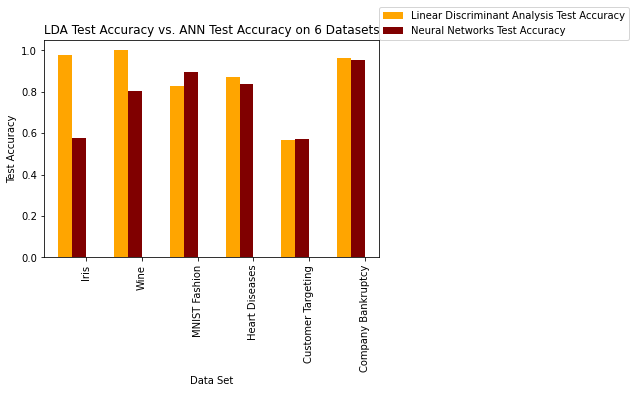

In [392]:
fig = plt.figure(figsize=(576,432))
df.plot(kind='bar',x='Data Set', color = ['orange', 'maroon'], y=['Linear Discriminant Analysis Test Accuracy','Neural Networks Test Accuracy'], position=1)
plt.ylabel("Test Accuracy")
plt.title('LDA Test Accuracy vs. ANN Test Accuracy on 6 Datasets')
plt.legend(loc=(1, 1))
plt.show()